Your first requirement is to create a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

^do I want average temperature, humidity, cloudiness, wind speed versus latitude???

Notes - latitude ranges from -90 to 90, longitude ranges from -180 to 180 - do I just get random data points from the API...??? Random lat & longitude combos wouldn't work because that's not necessarily a city

In [3]:
 # Dependencies
import requests
import json
import random
from citipy import citipy
import numpy as np
import matplotlib.pyplot as plt
from config import api_key

In [4]:
#generate random list for latitudes and longitudes in excess of 500 - will need more 

latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)

In [5]:
#Combine latitude and longitude into one tuple

coordinates = tuple(zip(latitude,longitude))

In [6]:
#use citipy library to find the nearest city for all latitudes and longitudes

cities = []
country = []

for lat,lon in coordinates:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)

In [7]:
#Remove duplicates
cities=list(set(cities))
len(cities)

754

In [8]:
# Create lists to hold city data
lat=[]
lon=[]
temps=[]
humidity=[]
cloudiness=[]
wind_speed=[]

#Loop through cities to request data and write to list
for city in cities:
    
    city_name=city
    url=f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=IMPERIAL&appid={api_key}'
    response = requests.get(url).json()
#    print(f'City name is {city_name}')
    
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temps.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        
    except KeyError:
        lat.append(np.nan)
        lon.append(np.nan)
        temps.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        
#        print('Missing information - skipped ')
        
#    print(f"The {city} temperate is {(response['main']['temp'])}, with {response['main']['humidity']}% humidity, {response['clouds']['all']}% cloudiness, and {response['wind']['speed']}mph winds")

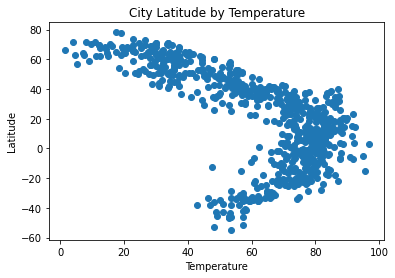

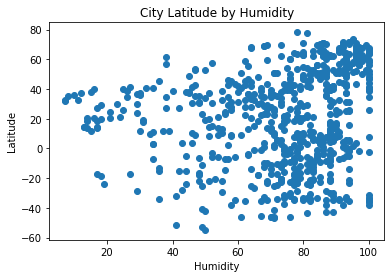

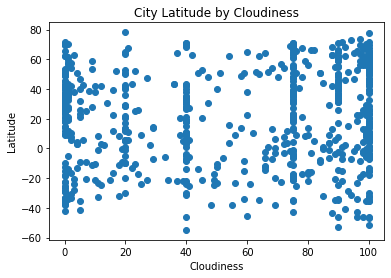

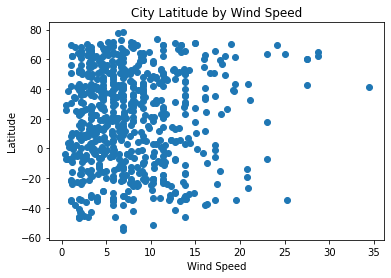

In [45]:
city_data={'Temperature': temps, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed}

for key, value in city_data.items():
    #Clear plot
    plt.cla()
    
    #Create scatter plots
    title=f"{key} by Latitude Scatter"
    fig_title=f"{value}_scatter"
    fig_title=plt.scatter(value, lat, marker="o")
    
    #Incorporate the other graph properties
    plt.title(f"City Latitude by {key}")
    plt.xlabel(key)
    plt.ylabel("Latitude")

    #Save the figure as PNG
    plt.savefig(f"{title}.png")

    #Show plot
    plt.show()

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Northern Hemisphere - Temperature (F) vs. Latitude
Southern Hemisphere - Temperature (F) vs. Latitude
Northern Hemisphere - Humidity (%) vs. Latitude
Southern Hemisphere - Humidity (%) vs. Latitude
Northern Hemisphere - Cloudiness (%) vs. Latitude
Southern Hemisphere - Cloudiness (%) vs. Latitude
Northern Hemisphere - Wind Speed (mph) vs. Latitude
Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

In [ ]:
#Calculate linear regression model
# Perform a linear regression on average tumor volume versus weight
#mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(capomulin_weight, capomulin_ave_tumor)

# Create equation of line to calculate predicted violent crime rate
#mouse_fit = mouse_slope * capomulin_weight + mouse_int

#plt.scatter(capomulin_weight, capomulin_ave_tumor)
#plt.plot(capomulin_weight, mouse_fit,"--")
#plt.xticks(rotation=90)
#plt.suptitle("Mouse Weight by Average Tumor Size on Capomulin")
#plt.xlabel('Weight (g)')
#plt.ylabel('Average Tumor Size')
#plt.show()

Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save a CSV of all retrieved data and a PNG image for each scatter plot.